In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("./datasets/waterbird/metadata.csv")
df.head(5)

,img_id,img_filename,y,split,place,place_filename
0,1,001.Black_footed_Albatross/Black_Footed_Albatr...,1,2,1,/o/ocean/00002178.jpg
1,2,001.Black_footed_Albatross/Black_Footed_Albatr...,1,0,1,/l/lake/natural/00000065.jpg
2,3,001.Black_footed_Albatross/Black_Footed_Albatr...,1,2,0,/b/bamboo_forest/00000131.jpg
3,4,001.Black_footed_Albatross/Black_Footed_Albatr...,1,0,1,/o/ocean/00001268.jpg
4,5,001.Black_footed_Albatross/Black_Footed_Albatr...,1,0,1,/o/ocean/00003147.jpg


In [70]:
LANDBIRD = 0
WATERBIRD = 1
LAND = 0
WATER = 1

In [4]:
train_df = df[df['split'] == 0]
val_df = df[df['split'] == 1]
test_df = df[df['split'] == 2]

len(train_df), len(test_df), len(val_df)

(4795, 5794, 1199)

## Plot random images from dataset

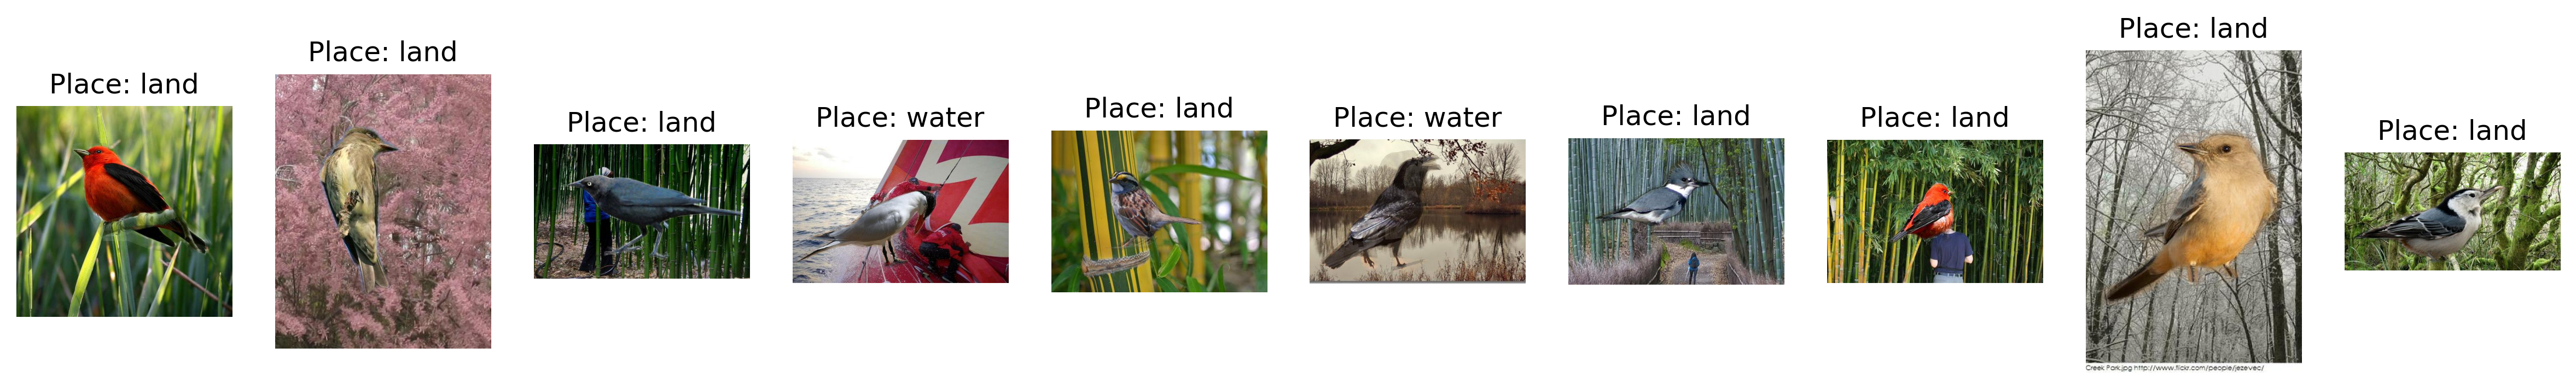

In [63]:
n_images = 10
idx = np.random.randint(0, len(df), n_images)
img_paths, places = list(df.iloc[idx]['img_filename']), list(
    df.iloc[idx]['place'])

fig, axes = plt.subplots(1, n_images, figsize=(20, 5), dpi=300)
for img_path, place, ax in zip(img_paths, places, axes):
    img_path = os.path.join("./datasets/waterbird", img_path)
    img = Image.open(img_path)
    place = "land" if place == 0 else "water"
    ax.imshow(img)
    ax.set_title(f'Place: {place}')
    ax.axis("off")

plt.show()

## Statistics

In [76]:
num_landbird = df[df['y'] == LANDBIRD].shape[0]
num_waterbird = df[df['y'] == WATERBIRD].shape[0]
land_bird_on_land = df[(df['place'] == LAND) & (df['y'] == LANDBIRD)].shape[0]
waterbird_on_water = df[(df['place'] == WATER) & (df['y'] == WATERBIRD)].shape[0]
land_bird_on_water = df[(df['place'] == WATER) & (df['y'] == LANDBIRD)].shape[0]
water_bird_on_land = df[(df['place'] == LAND) &(df['y'] == WATERBIRD)].shape[0]

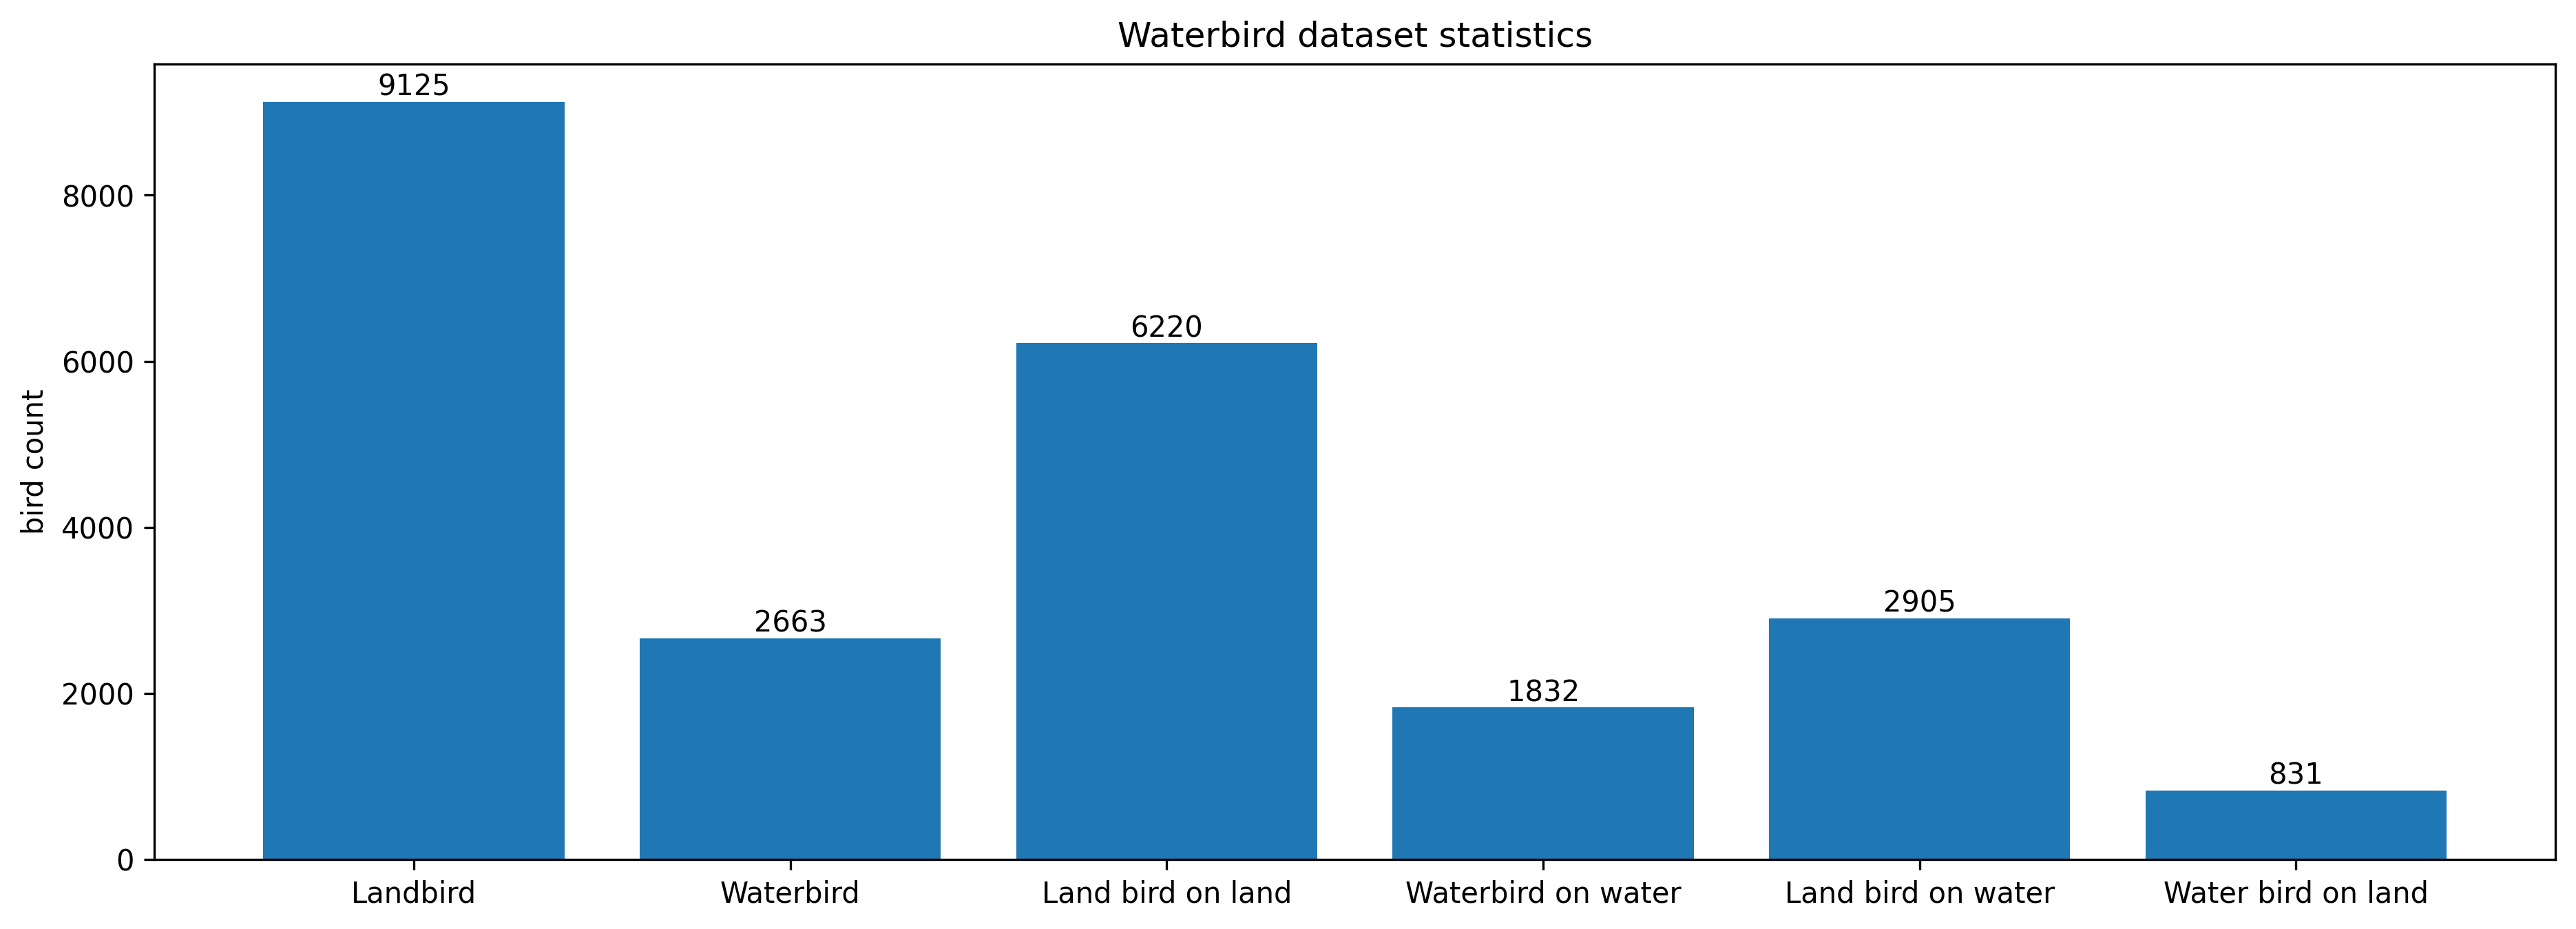

In [93]:
# fig, ax = plt.subplots()

birds_count = ['Landbird', 'Waterbird',
               'Land bird on land', 'Waterbird on water', 'Land bird on water', 'Water bird on land']
counts = [num_landbird, num_waterbird,
          land_bird_on_land, waterbird_on_water, land_bird_on_water, water_bird_on_land]

plt.figure(figsize=(15, 5), dpi=300)
bars = plt.bar(birds_count, counts)
plt.ylabel("bird count")
plt.title('Waterbird dataset statistics')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval +
             0.5, int(yval), ha='center', va='bottom')
plt.show()

In [2]:
true_labels = np.load("../../Download/Waterbird/landbird-waterbird/true_labels.npy")
predicted_labels = np.load("../../Download/Waterbird/landbird-waterbird/predicted_labels.npy")

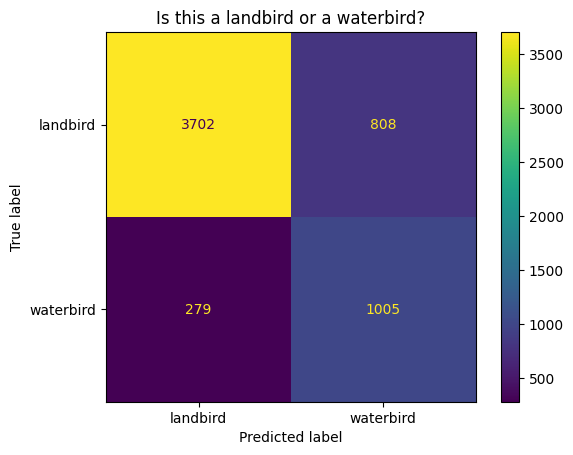

In [3]:
confusion_matrix = confusion_matrix(true_labels, predicted_labels)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["landbird", "waterbird"])

cm_display.plot()
plt.title('Is this a landbird or a waterbird?')
plt.savefig('./matrix.png')
plt.show()

In [4]:
classification_report = classification_report(true_labels, predicted_labels)
print(classification_report)

              precision    recall  f1-score   support

    landbird       0.93      0.82      0.87      4510
   waterbird       0.55      0.78      0.65      1284

    accuracy                           0.81      5794
   macro avg       0.74      0.80      0.76      5794
weighted avg       0.85      0.81      0.82      5794

